# IRIS DATASET

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
iris = pd.read_csv('data.csv', sep=',')

In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


In [24]:
iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Exploratory Data Analysis

### Count

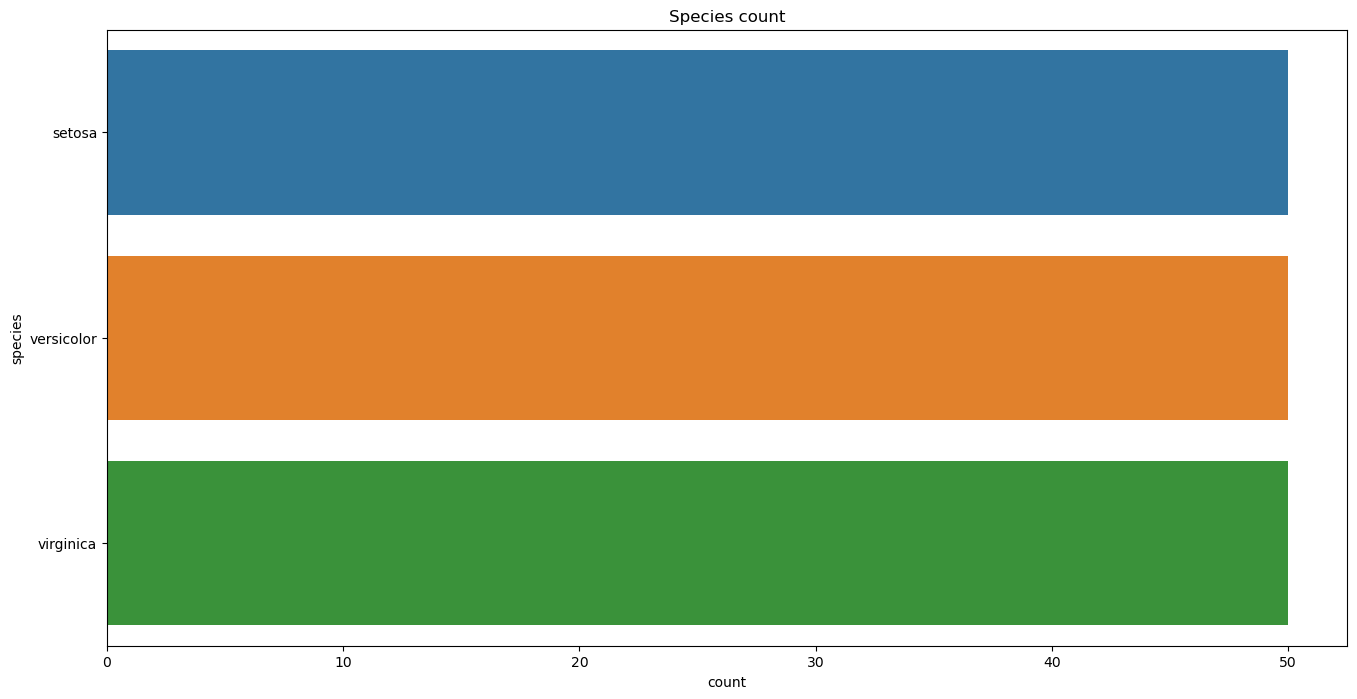

In [55]:
plt.figure(figsize=(16,8))
plt.title("Species count")
sns.countplot(data=iris, y="species", hue="species")
plt.show()

### Multiplot

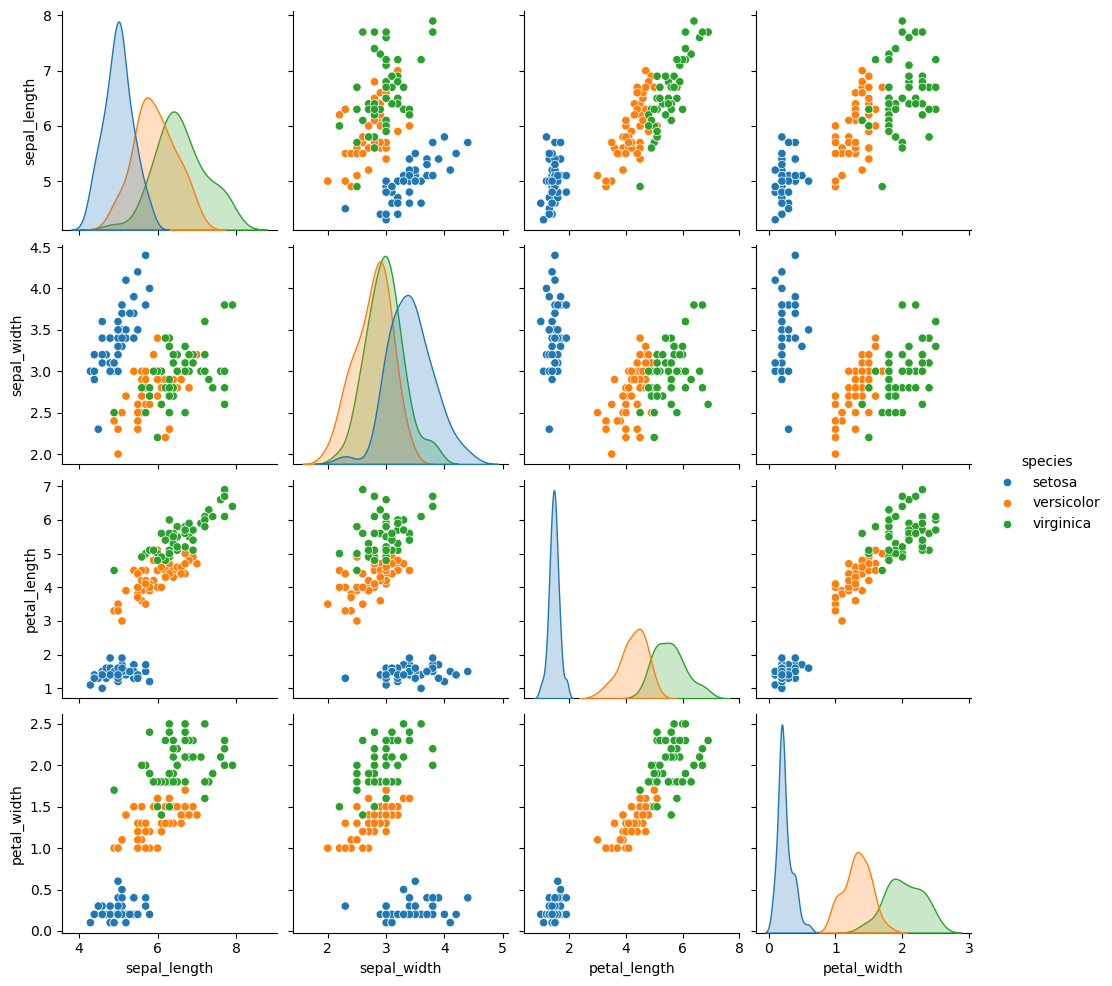

In [8]:
sns.pairplot(data=iris, hue="species")

### Correlation

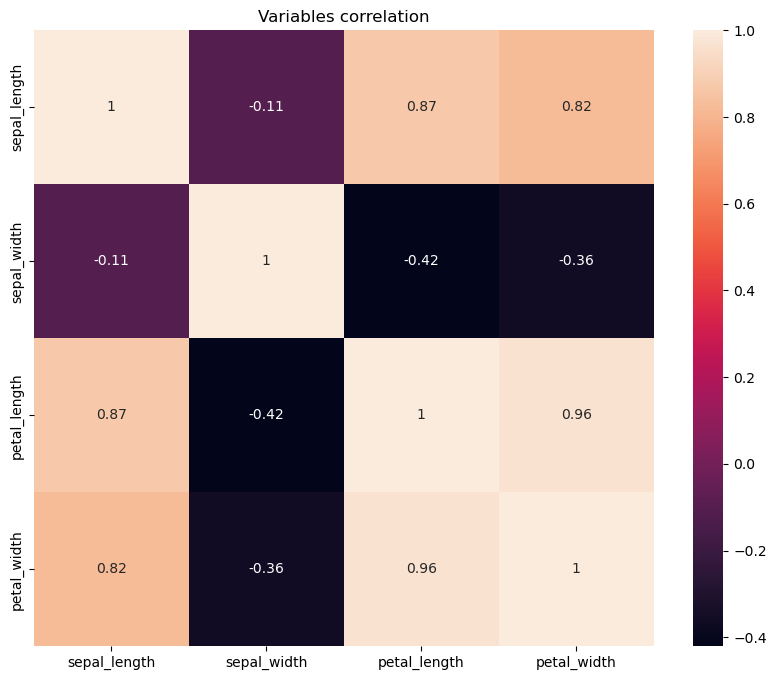

In [46]:
plt.figure(figsize=(10,8))
plt.title("Variables correlation")
sns.heatmap(data=iris.corr(numeric_only=True), annot=True)
plt.show()

### Boxplot

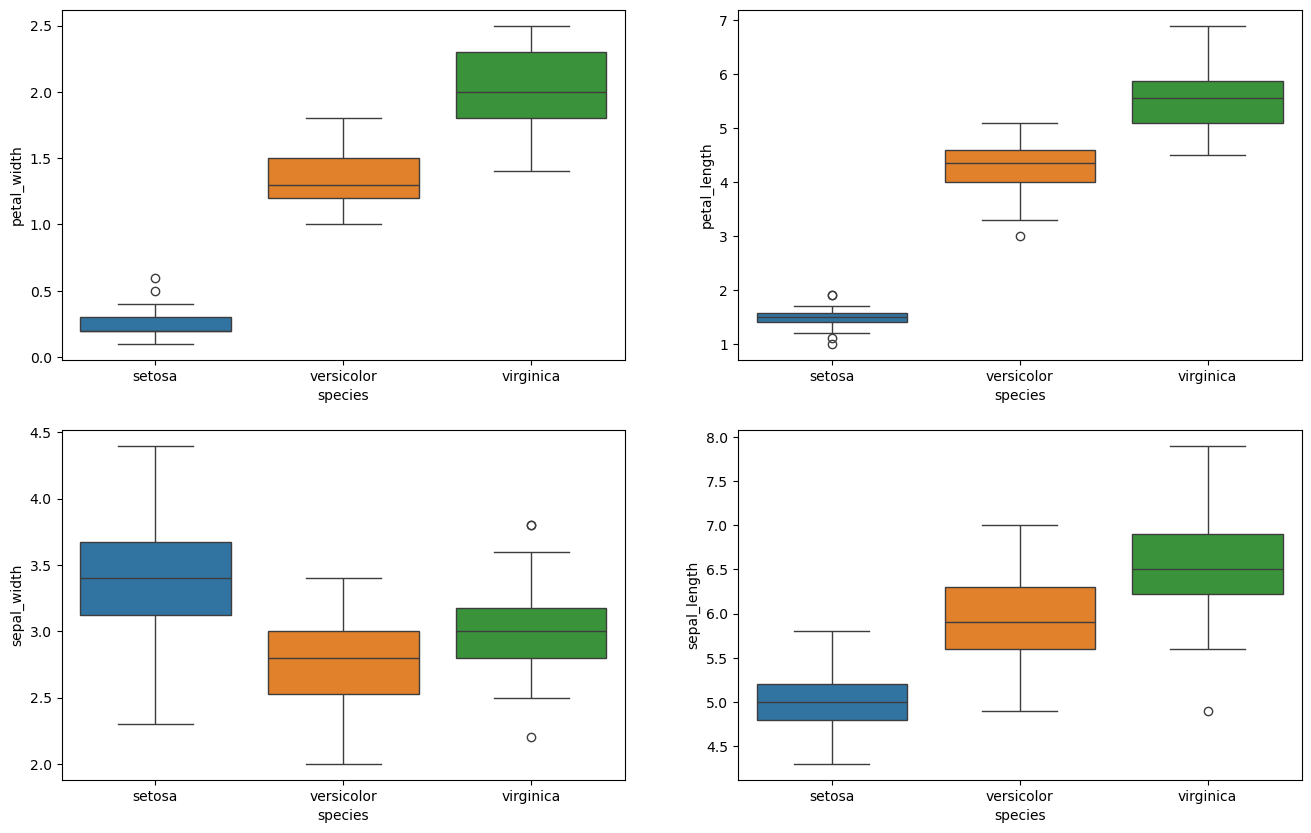

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
sns.boxplot(y="petal_width", x="species", data=iris, hue="species", orient='v', ax=axes[0, 0])
sns.boxplot(y="petal_length", x="species", data=iris, hue="species", orient='v', ax=axes[0, 1])
sns.boxplot(y="sepal_width", x="species", data=iris, hue="species", orient='v', ax=axes[1, 0])
sns.boxplot(y="sepal_length", x="species", data=iris, hue="species", orient='v', ax=axes[1, 1])
plt.show()

### Violin

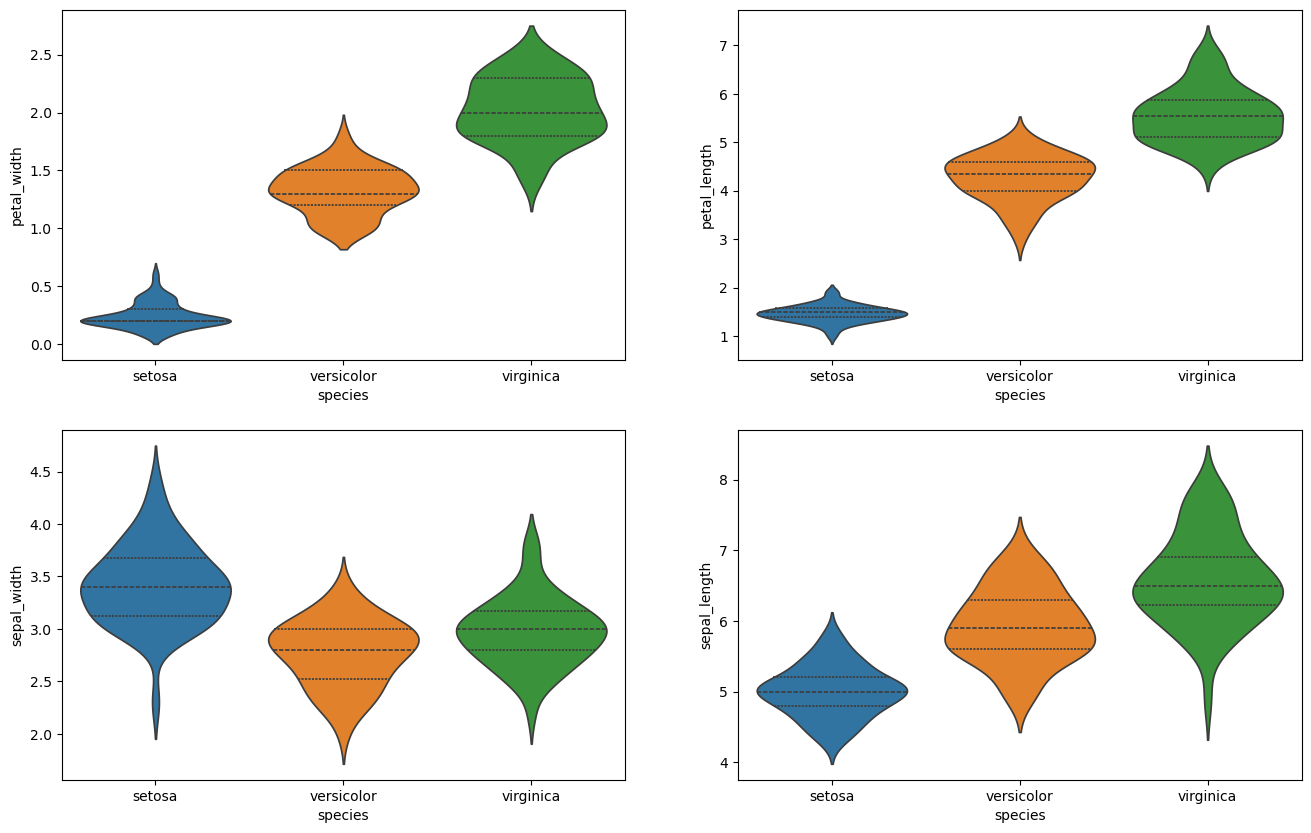

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
sns.violinplot(y="petal_width", x="species", data=iris, hue="species", orient='v', ax=axes[0, 0], inner='quartile')
sns.violinplot(y="petal_length", x="species", data=iris, hue="species", orient='v', ax=axes[0, 1], inner='quartile')
sns.violinplot(y="sepal_width", x="species", data=iris, hue="species", orient='v', ax=axes[1, 0], inner='quartile')
sns.violinplot(y="sepal_length", x="species", data=iris, hue="species", orient='v', ax=axes[1, 1], inner='quartile')
plt.show()

# ML


## K-MEANS :(

In [350]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [ ]:
iris_kmeans = iris.values[:, :-1] 

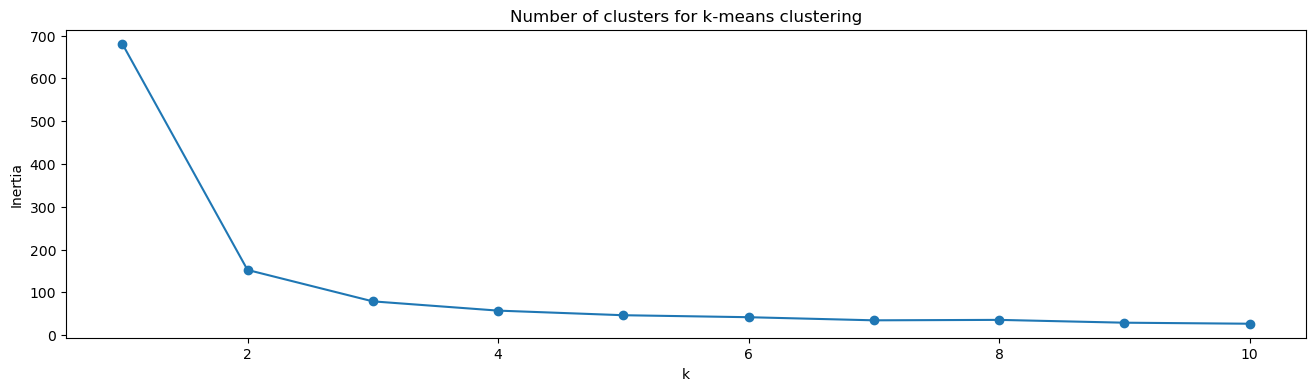

In [349]:
inertias = []
max_iter = 11

for i in range(1, max_iter):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(iris_kmeans)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(16, 4))
plt.title("Number of clusters for k-means clustering")
plt.plot(range(1, max_iter), inertias, "-o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

In [336]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(iris_kmeans)
y_kmeans = kmeans.predict(iris_kmeans)

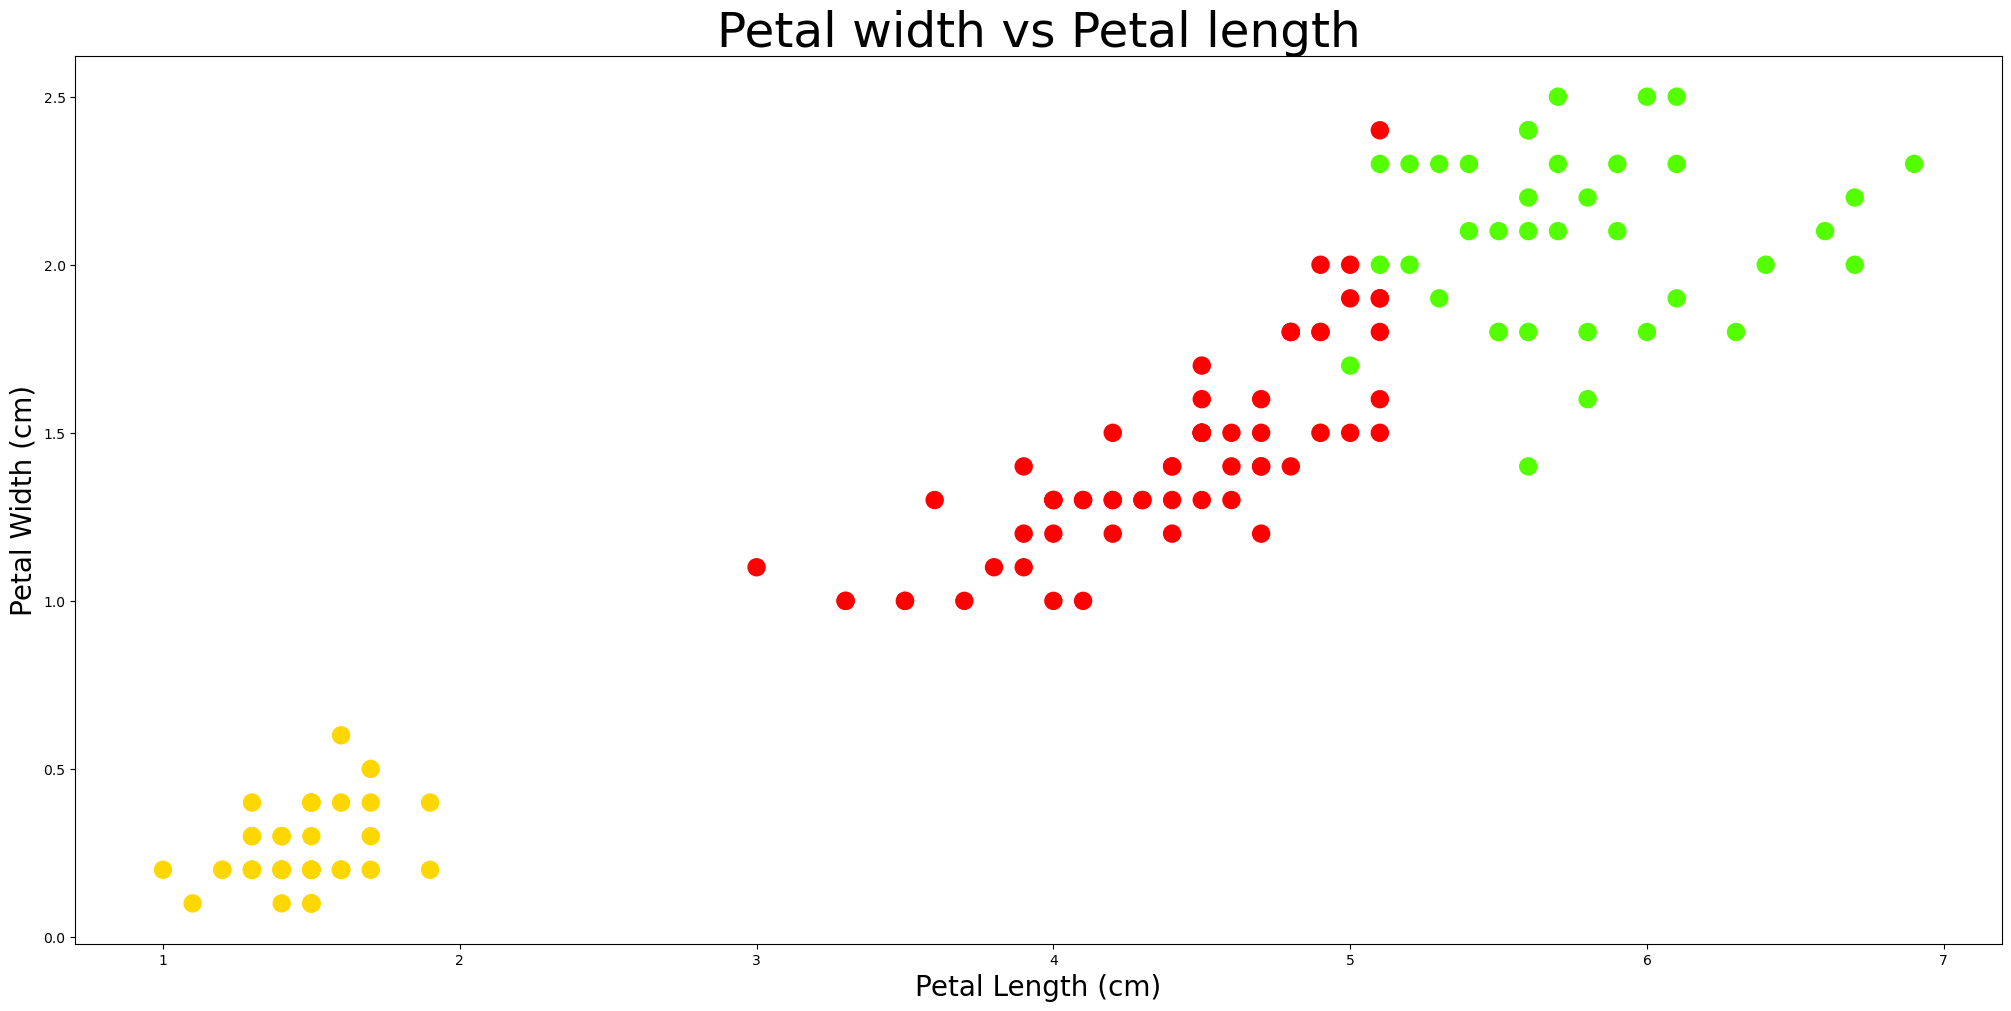

In [341]:
plt.figure(figsize=(20,10), layout="constrained")
plt.title("Petal width vs Petal length", fontsize=35)
plt.scatter(iris_kmeans[:,2], iris_kmeans[:,3], c=y_kmeans, cmap="prism", s=150)
plt.xlabel("Petal Length (cm)", fontsize=20)
plt.ylabel("Petal Width (cm)", fontsize=20)
plt.show()

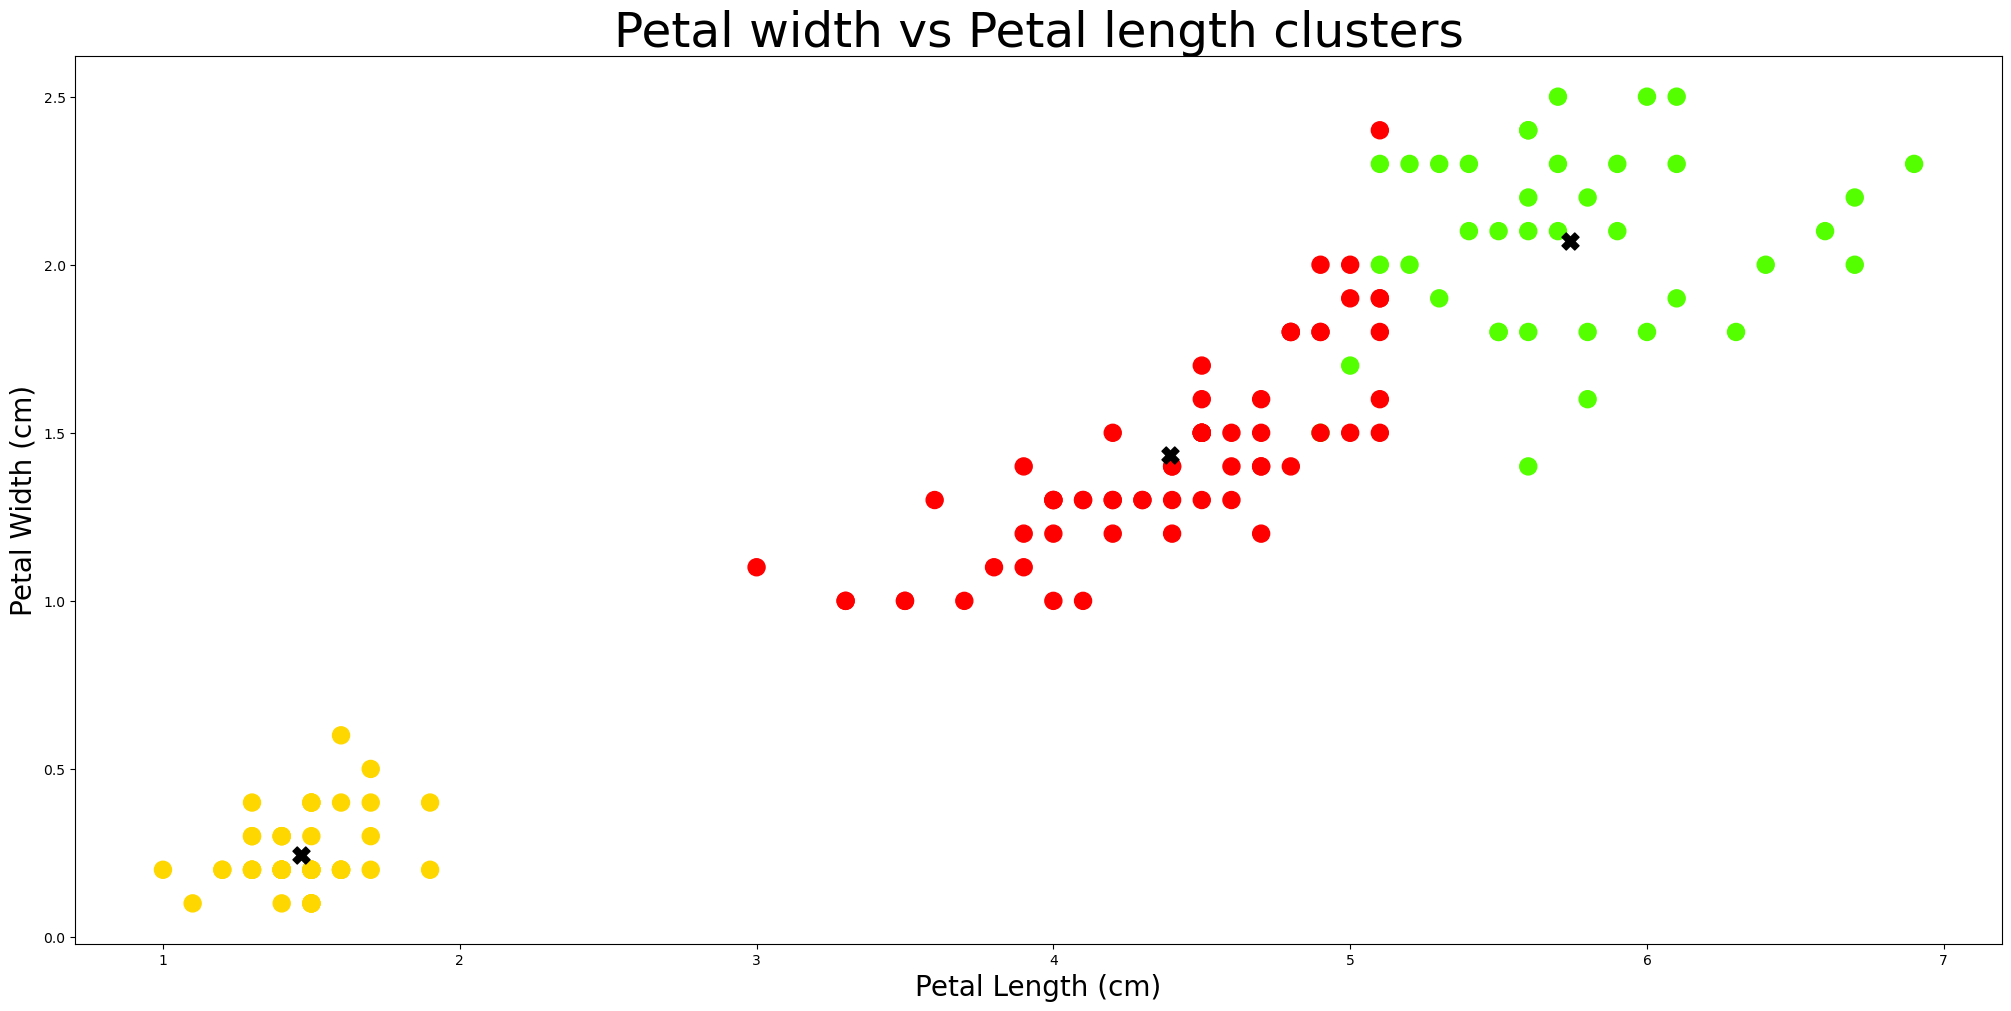

In [340]:
plt.figure(figsize=(20, 10), layout="constrained")
plt.title("Petal width vs Petal length clusters", fontsize=35)

plt.scatter(iris_kmeans[:,2], iris_kmeans[:,3], c=y_kmeans, cmap="prism", marker="o", s=150)
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], c="black", marker="X", s=150)

plt.xlabel("Petal Length (cm)", fontsize=20)
plt.ylabel("Petal Width (cm)", fontsize=20)

plt.show()


## Decision Tree


## SVM



## Random Forest